In [47]:
import os
import re
import matplotlib.pyplot as plt

In [161]:
def get_losses(file_path, sample):
    with open(os.path.abspath(file_path), 'r') as loss_file:
        losses=[]
        for line in loss_file:
            try:
                found = re.search('Loss: tensor\((.+?)\,', line).group(1)
            except AttributeError:
                continue
            losses.append(float(found))
        losses = losses[::sample]
        iterations = list(range(len(losses)))
        return losses, iterations
    
def show_plot(losses, iterations):
    plt.figure(figsize=(30,30))
    plt.plot(iterations, losses)
    plt.xlabel('Iterations', fontsize=40)
    plt.ylabel('Loss', fontsize=40)
    plt.show()

In [169]:
len(x_raw_newsqa)

181

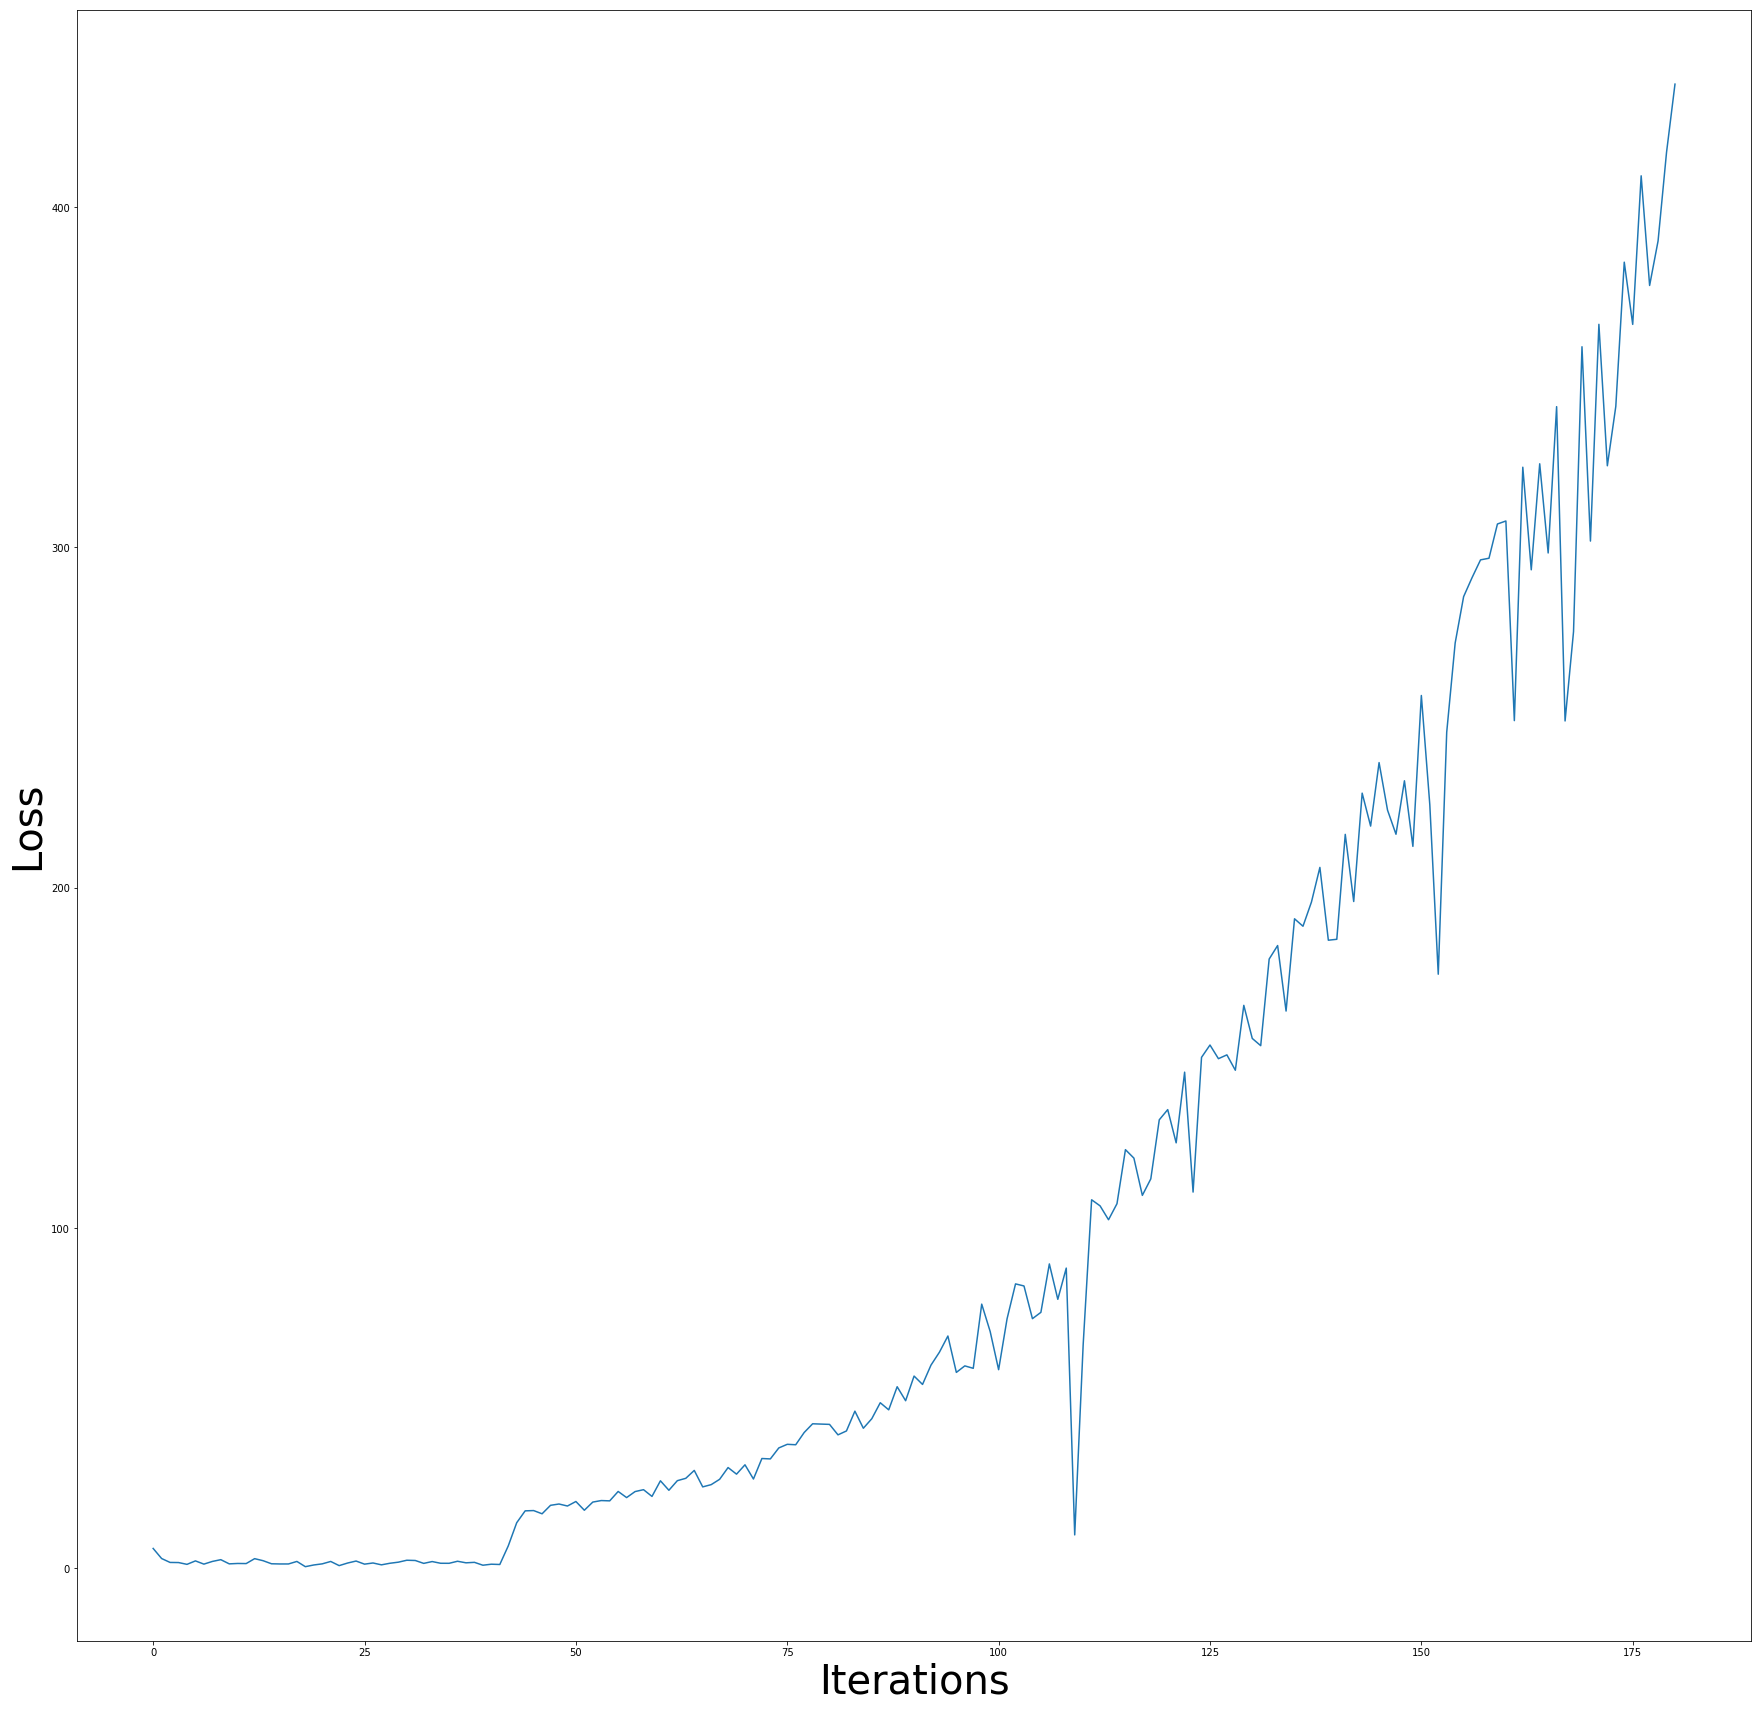

In [168]:
y_raw_newsqa,x_raw_newsqa = get_losses("./losses/loss_log_4.2", 10)
show_plot(y_raw_newsqa,x_raw_newsqa)

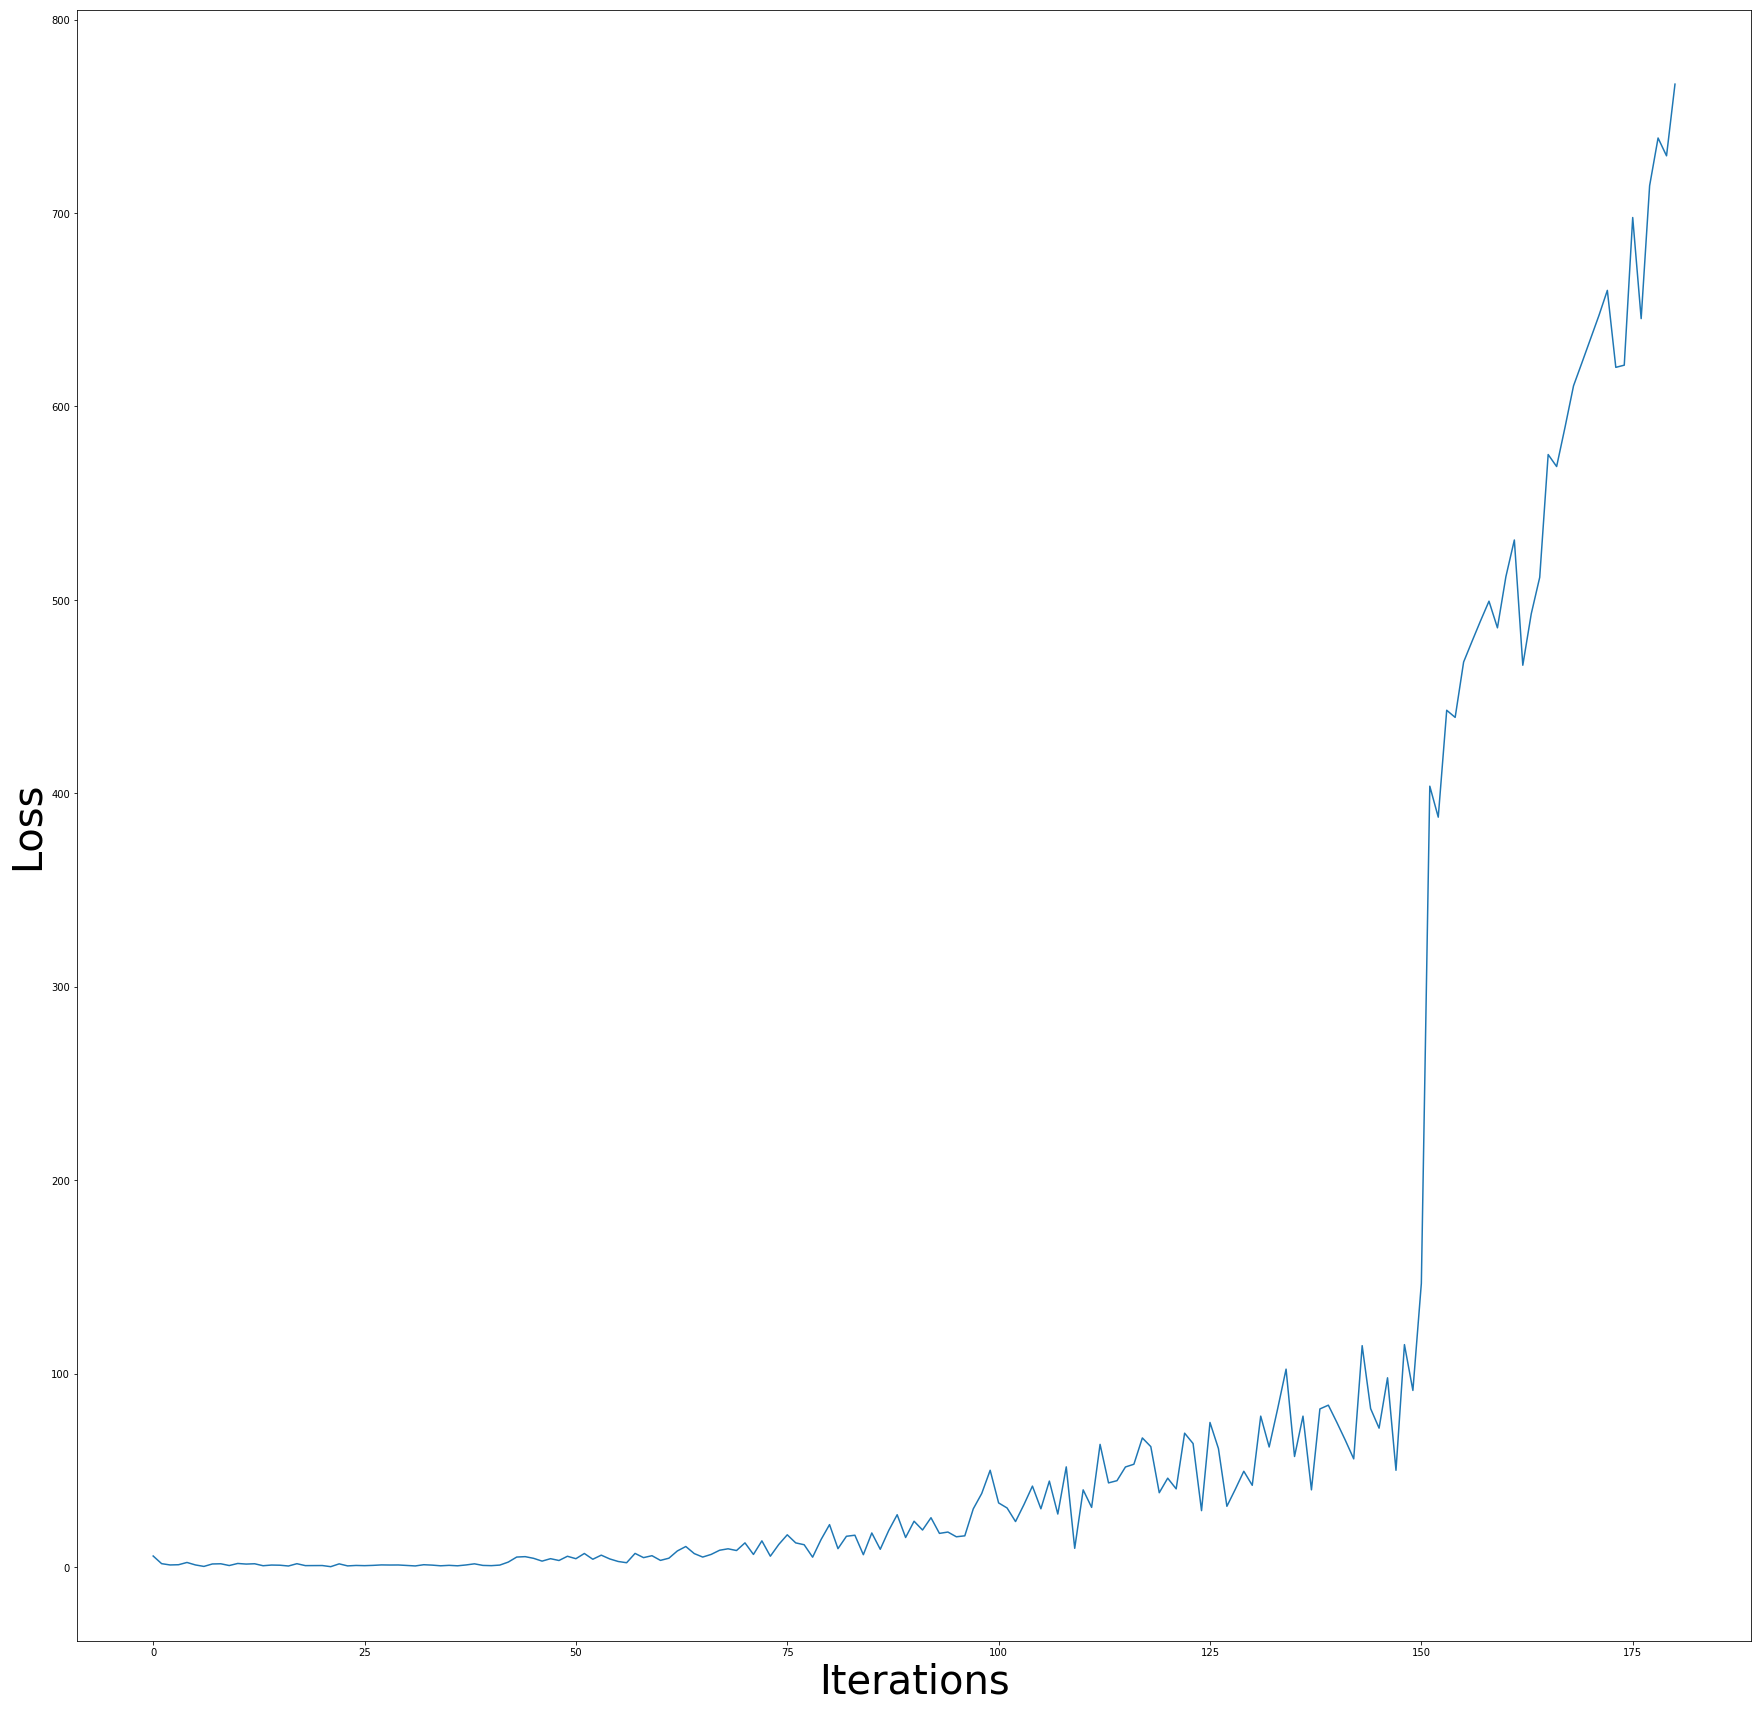

In [95]:
get_losses("./losses/loss_log_4.1", 30)

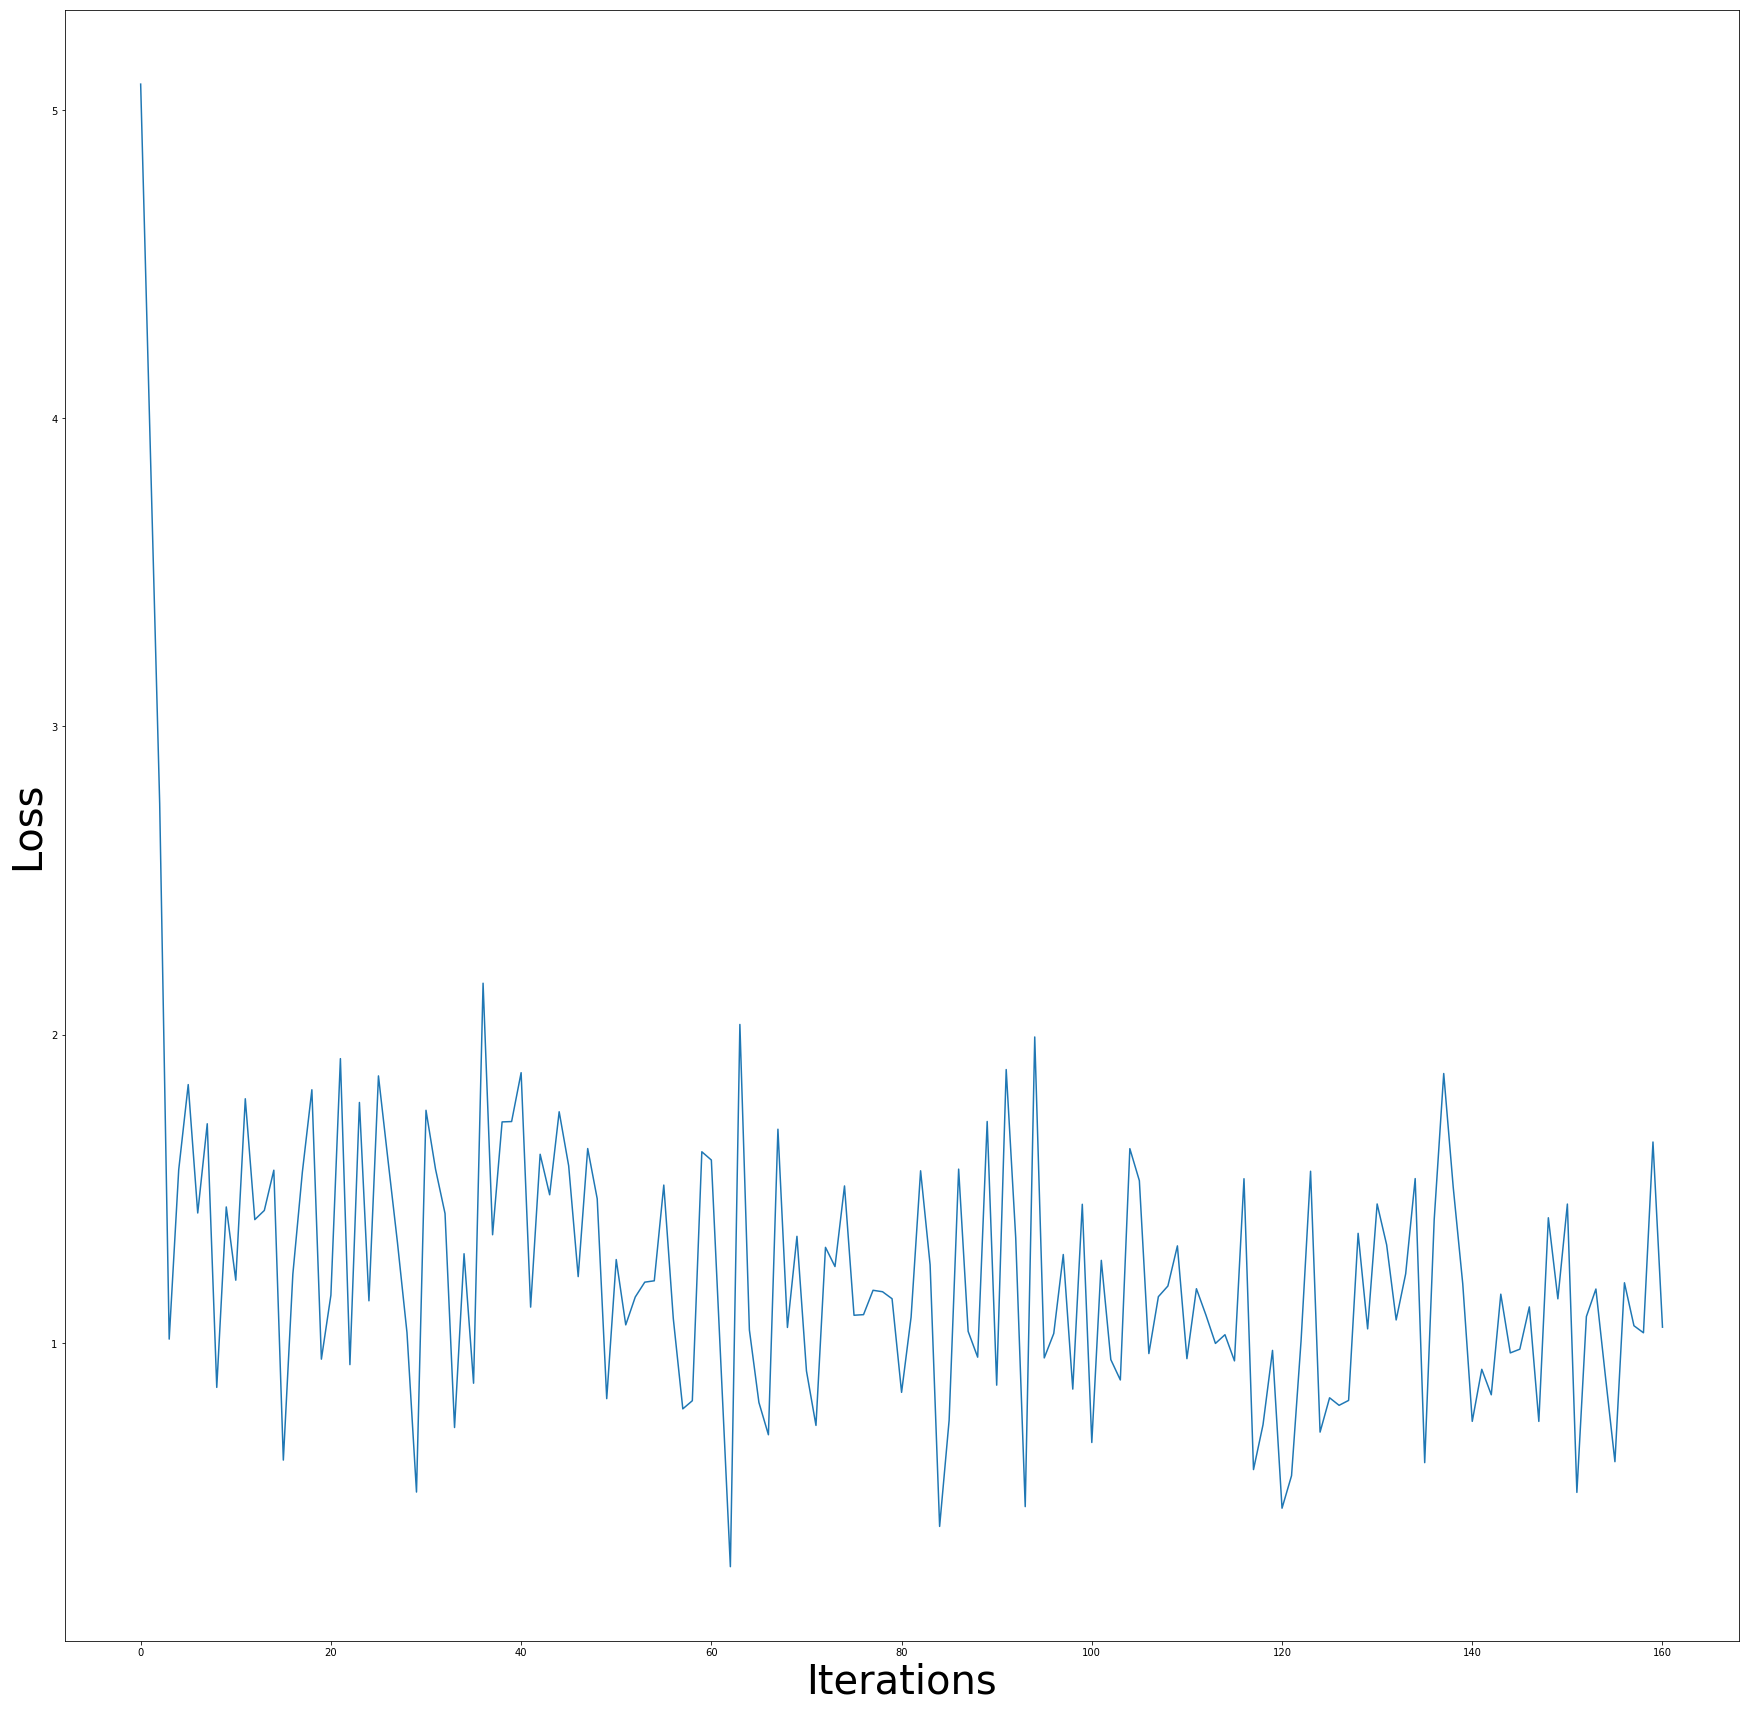

In [96]:
get_losses("./losses/loss_log_newsqa_newsqa", 30)

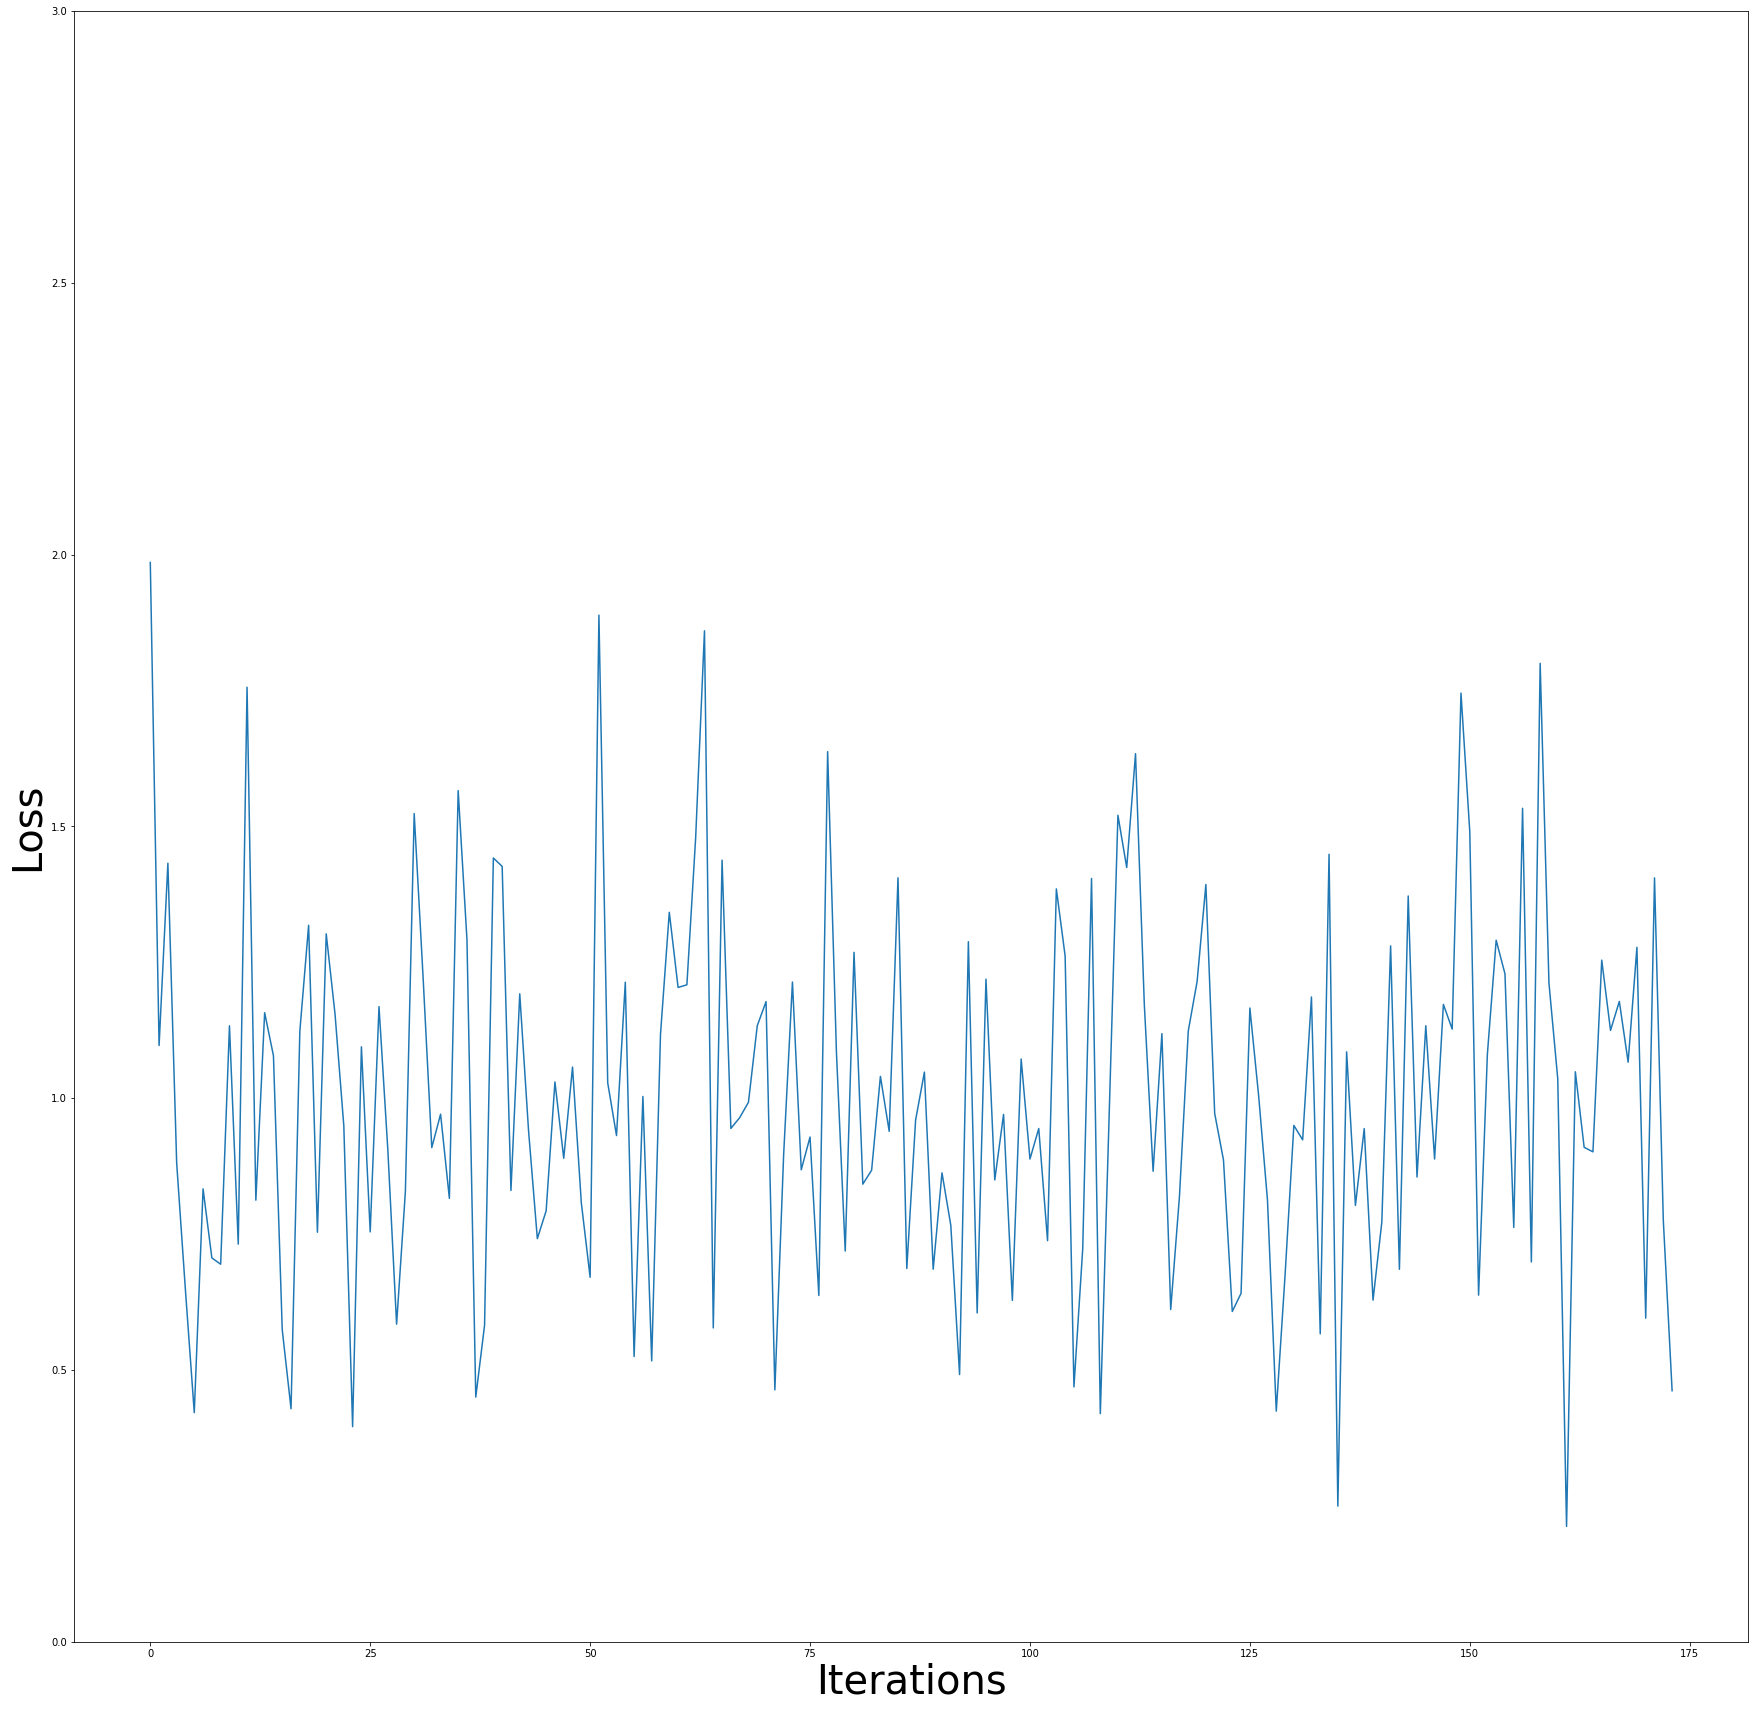

In [158]:
y,x = get_losses("./losses/loss_log_newsqa_nmt", 100)
show_plot(y,x)

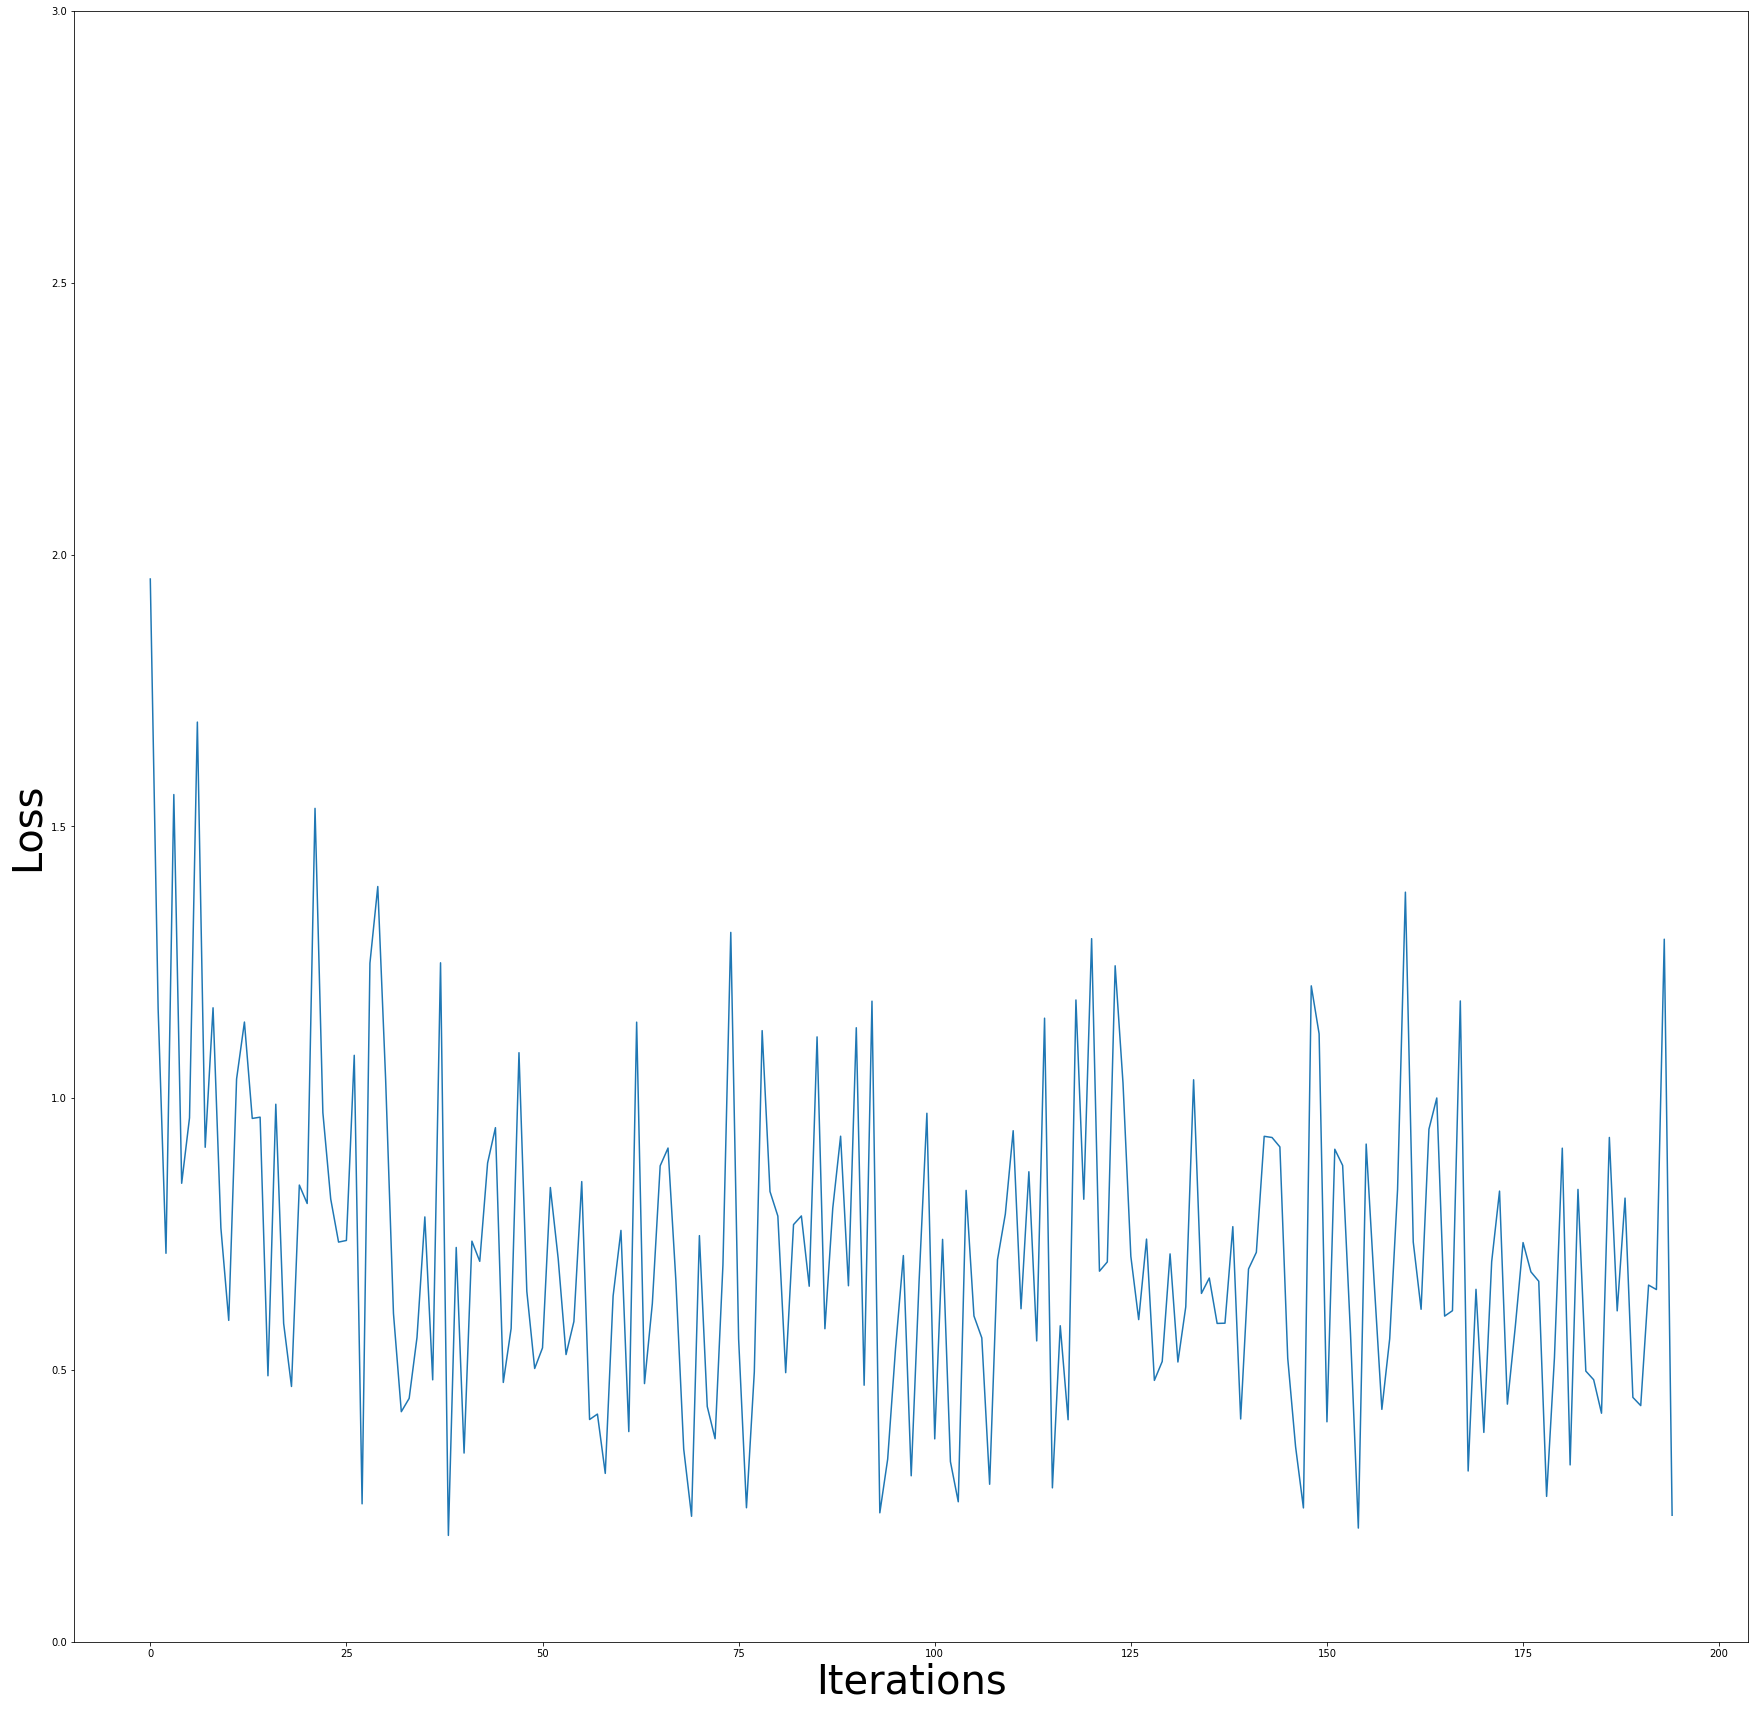

In [157]:
y,x = get_losses("./losses/loss_log_newsqa_synonym", 100)
show_plot(y,x)

In [175]:
# Define a function for a plot with two y axes
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):
    # Each variable will actually have its own plot object but they
    # will be displayed in just one plot
    # Create the first plot object and draw the line
    _, ax1 = plt.subplots(figsize=(20, 20))
    ax1.plot(x_data, y1_data, color = y1_color)
    # Label axes
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_ylim(0,350)
    ax1.set_title(title)

    # Create the second plot object, telling matplotlib that the two
    # objects have the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    ax2.set_ylim(0,350)
    # Show right frame line
    ax2.spines['right'].set_visible(True)

In [171]:
y_synonym, x_synonym = get_losses("./losses/loss_log_newsqa_synonym", 100)
y_nmt, x_nmt = get_losses("./losses/loss_log_newsqa_nmt", 100)
y_synonym, x_synonym = y_synonym[:len(y_nmt)], x_synonym[:len(x_nmt)]
y_raw_newsqa,x_raw_newsqa = y_raw_newsqa[:len(y_nmt)] ,x_raw_newsqa[:len(y_nmt)]

In [170]:
len(x_nmt)

174

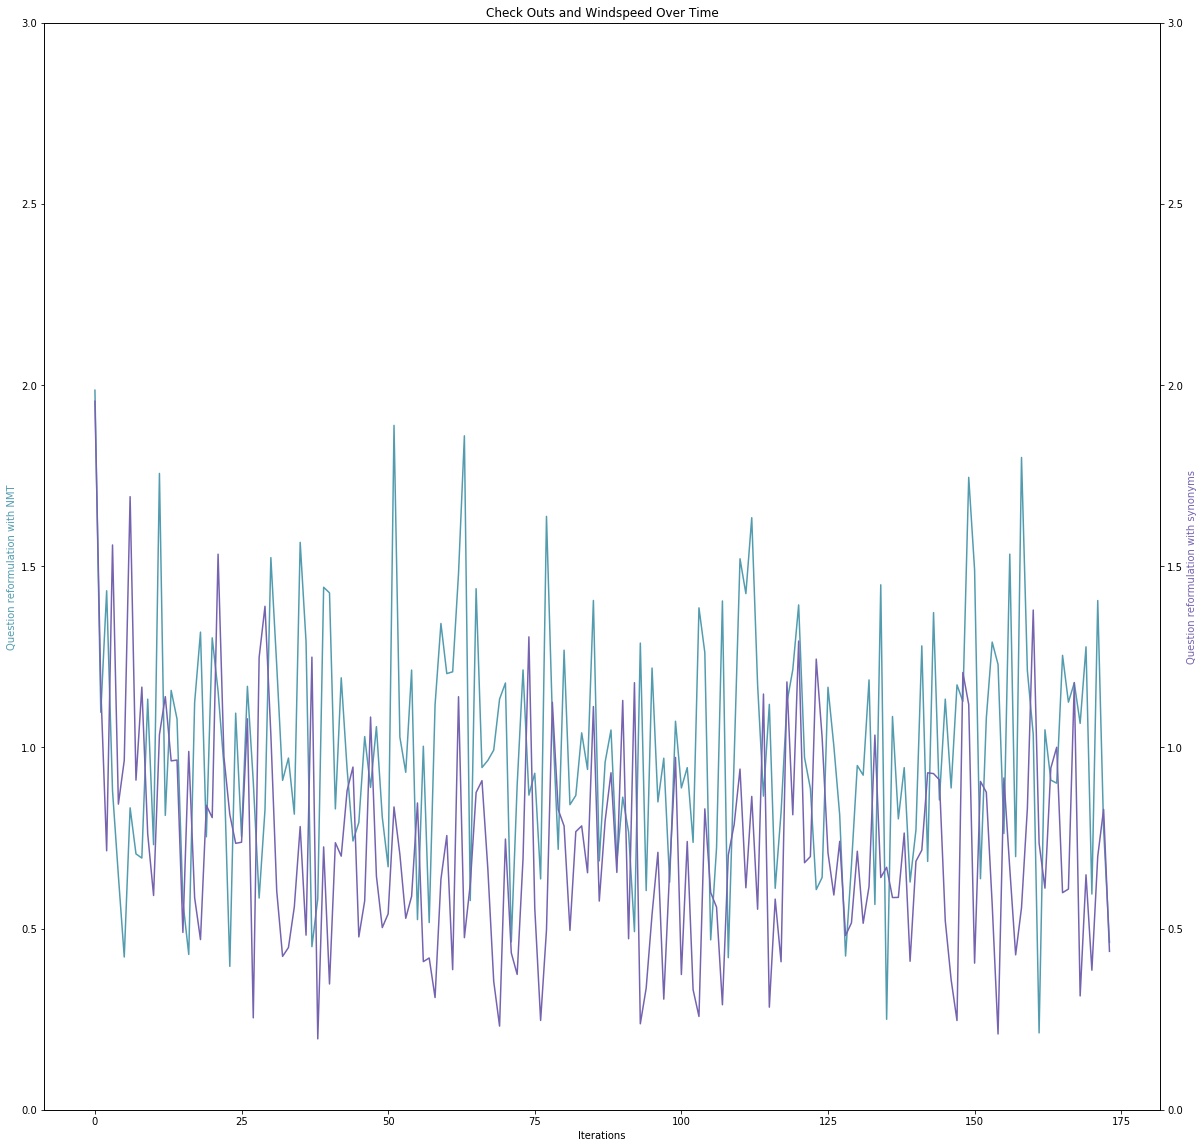

In [155]:

# Call the function to create plot
lineplot2y(x_data = x_synonym
           , x_label = 'Iterations'
           , y1_data = y_nmt
           , y1_color = '#539caf'
           , y1_label = 'Question reformulation with NMT'
           , y2_data = y_synonym
           , y2_color = '#7663b0'
           , y2_label = 'Question reformulation with synonyms'
           , title = 'Check Outs and Windspeed Over Time')

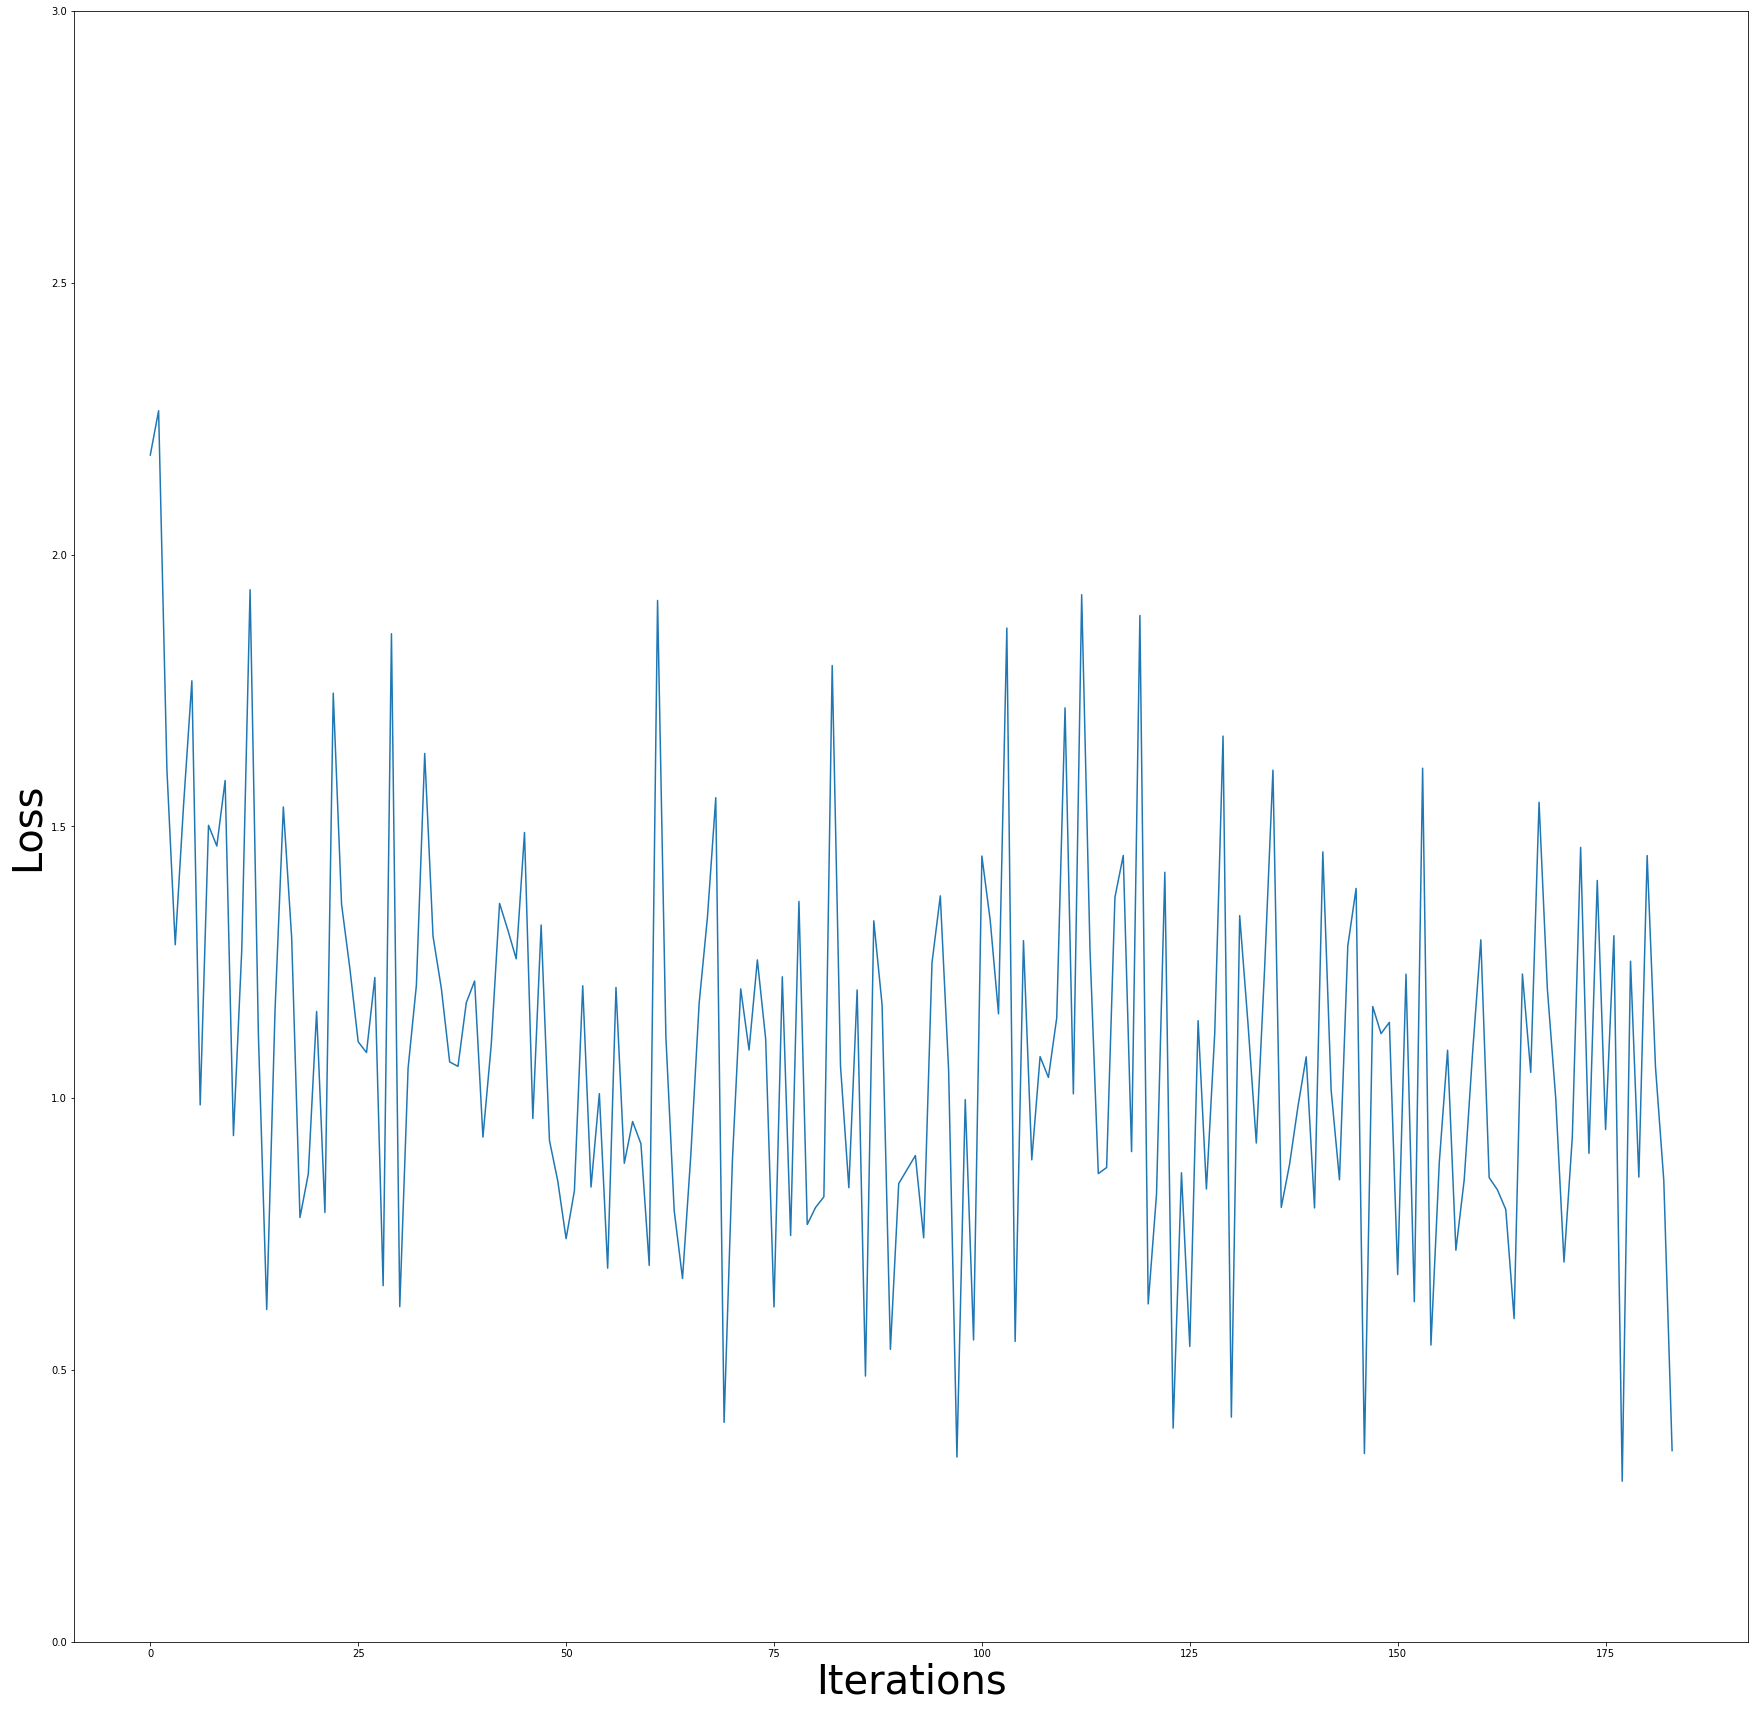

In [149]:
y, x = get_losses('./losses/loss_log_newsqa_who-when-what',20)
show_plot(y,x)

In [ ]:
y_raw_newsqa,x_raw_newsqa

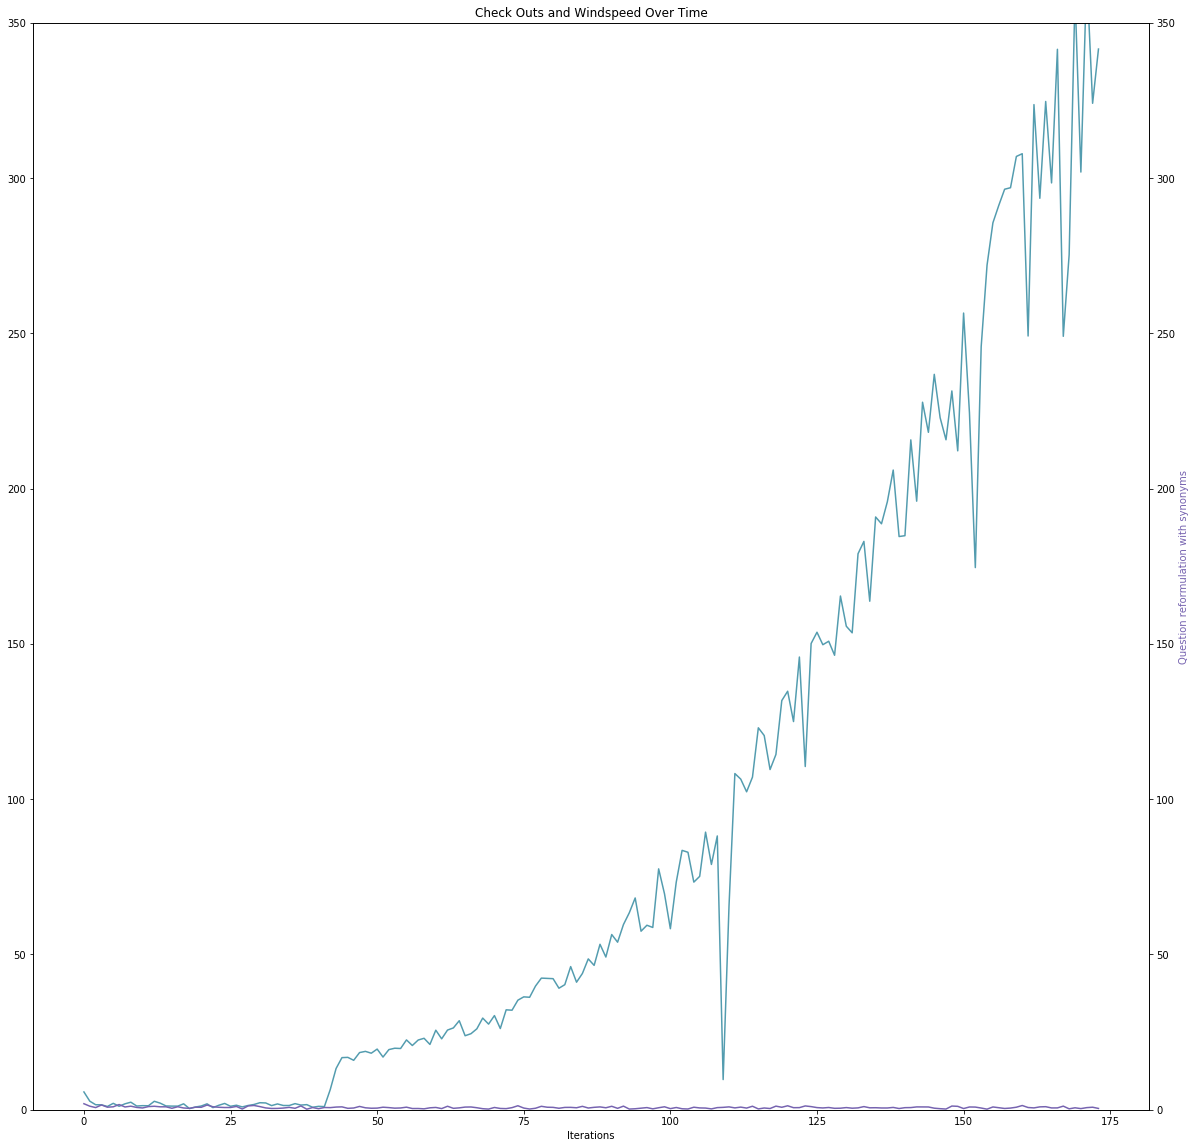

In [176]:
# Call the function to create plot
lineplot2y(x_data = x_synonym
           , x_label = 'Iterations'
           , y1_data = y_raw_newsqa
           , y1_color = '#539caf'
           , y1_label = ''
           , y2_data = y_synonym
           , y2_color = '#7663b0'
           , y2_label = 'Question reformulation with synonyms'
           , title = 'Check Outs and Windspeed Over Time')